**Név:** Rafain Emőke

**Szak:** Data Science

# **Practice**

Készítsetek egy-egy vizualizációt

  * Python,
  * D3 és
  * Flourish segítségével.

Felhasználható adatok: https://informationisbeautiful.net/data/

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
sns.set_style("white")
sns.set_palette("tab20")

In [4]:
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (0.6823529411764706, 0.7803921568627451, 0.9098039215686274),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (1.0, 0.7333333333333333, 0.47058823529411764),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.596078431372549, 0.8745098039215686, 0.5411764705882353),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (1.0, 0.596078431372549, 0.5882352941176471),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.7725490196078432, 0.6901960784313725, 0.8352941176470589),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.7686274509803922, 0.611764705882353, 0.5803921568627451),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.9686274509803922, 0.7137254901960784, 0.8235294117647058),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7803921568627451, 0.7803921568627451, 0.7803921568627451),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.8588235294117647, 0.8588235294117647, 0.5529411764705883),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529),
 (0.6196078431372549, 0.8549019607843137, 0.8980392156862745)]

In [5]:
palette = sns.color_palette()

### **Python**

Adatok: What Does China Censor Online?

https://docs.google.com/spreadsheets/d/1O35gHiqjFBU3ZbB3ykqj64yDVkqzUVllJuxsYNgSuqs/edit?hl=en&hl=en&gid=0#gid=0



In [38]:
china_data = pd.read_csv("https://raw.githubusercontent.com/shecodespython/adatviz-2024/refs/heads/main/6th_Assignment/What%20Does%20China%20Censor%20Online_%20-%20censored%20keyswords%20%26%20sites.csv")
china_data.head()

,selected censored websites,banned search terms (wikipedia),banned search terms (conceptdoppler),sources
0,2008,as of 15/12/2008,as of 18/6/2008,NaN
1,01net.com,democracy,Shanghai clique,NaN
2,163.com,human rights,Chinese Central Propaganda Department,http://en.wikipedia.org/wiki/List_of_words_cen...
3,2ch.net,dictatorship,Buddha stretches a thousand hands,http://www.conceptdoppler.org/
4,4chan.org,despotism,eighty-nine,http://www.greatfirewallofchina.org/


In [39]:
banned_search_terms = pd.concat([china_data["banned search terms (wikipedia)"], china_data["banned search terms (conceptdoppler)"]], axis=0).reset_index(drop=True)
banned_search_terms.head()

,0
0,as of 15/12/2008
1,democracy
2,human rights
3,dictatorship
4,despotism


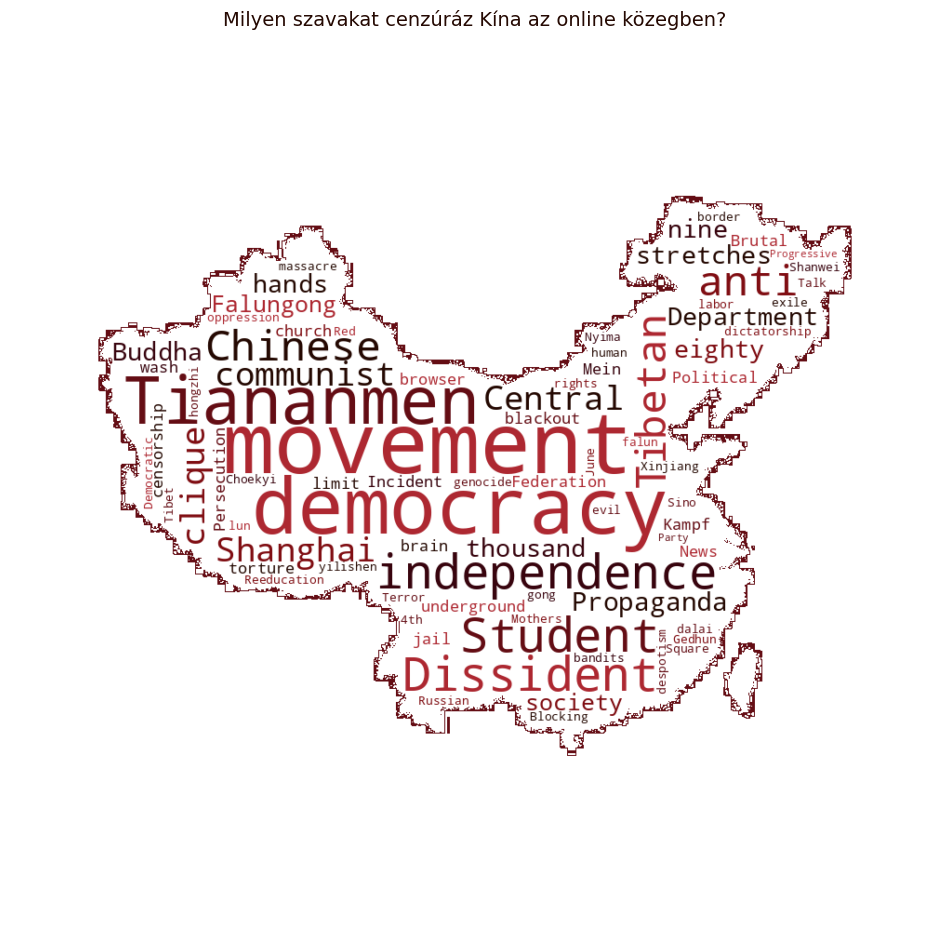

In [56]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS

mask = np.array(Image.open('china_cropped.JPG'))

text = banned_search_terms.str.cat(sep=' ')

custom_colors = ["#250902", "#38040e", "#640d14", "#800e13", "#ad2831"]

def alternating_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    index = np.random.randint(len(custom_colors))
    return custom_colors[index]

wordcloud = WordCloud(
    background_color="white",
    mask=mask,
    contour_color="#640d14",
    contour_width=1,
    stopwords=STOPWORDS,
    color_func=alternating_color_func,
).generate(text)

plt.figure(figsize=(12, 12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Milyen szavakat cenzúráz Kína az online közegben?", fontsize=14, color="#250902")
plt.show()

### **D3**
Adatok: Hollywood Hits & Flops 2023

https://docs.google.com/spreadsheets/d/12bnGB7w5T03f7Bq1PG6gqFIdsLccdP6E-86xdVjbCOc/edit?gid=423546026#gid=423546026


In [162]:
movie_data = pd.read_csv("https://raw.githubusercontent.com/shecodespython/adatviz-2024/refs/heads/main/6th_Assignment/The%20Hollywood%20In%24ider%20-%20all%20data%20-%202023%20for%20VizSweet.csv")
movie_data.head()

,Film,Year,Domestic gross ($m),Worldwide Gross ($m),Rotten Tomatoes critics,Rotten Tomatoes Audience,Budget ($m),budget recovered,times budget recovered,force label,...,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Distributor,ID
0,Avatar 2,2023,684.0,2320.0,76,92,250.0,928%,9.3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20th Century Studios,6.0
1,Barbie,2023,634.6,1437.9,88,84,145.0,992%,9.9,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Warner Bros.,2.0
2,Super Mario Bros,2023,574.0,1358.2,59,95,100.0,1358%,13.6,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Universal Pictures,1.0
3,Across the Spider-Verse,2023,381.2,686.9,95,94,100.0,687%,6.9,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Columbia Pictures,3.0
4,Guardians of the Galaxy 3,2023,358.9,845.3,81,94,250.0,338%,3.4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Walt Disney Studios Motion Pictures,4.0


In [163]:
movie_data.columns

Index(['Film', 'Year', 'Domestic gross ($m)', 'Worldwide Gross ($m)',
       'Rotten Tomatoes  critics', 'Rotten Tomatoes Audience ', 'Budget ($m)',
       'budget recovered', 'times budget recovered', 'force label',
       'critics vs audience divergence', ' Primary Genre', 'Genres',
       'IMDB Rating', 'exclude label', 'RT vs IMDB disparity', 'Unnamed: 16',
       'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20',
       'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24',
       'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28',
       'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32',
       'Unnamed: 33', 'Unnamed: 34', 'Distributor', 'ID'],
      dtype='object')

In [164]:
movie_data.describe()

,Year,Domestic gross ($m),Worldwide Gross ($m),Rotten Tomatoes critics,Rotten Tomatoes Audience,Budget ($m),times budget recovered,critics vs audience divergence,IMDB Rating,RT vs IMDB disparity,...,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,ID
count,97.0,97.000000,96.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,57.000000
mean,2023.0,87.690722,205.711458,67.257732,82.319588,80.830928,2.870103,15.061856,6.652577,15.793814,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.315789
std,0.0,124.263038,341.289990,20.914647,12.397535,78.809937,3.541309,19.753594,0.874773,10.705273,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.463388
min,2023.0,3.400000,3.400000,14.000000,48.000000,4.500000,0.000000,-34.000000,4.800000,-20.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
25%,2023.0,17.500000,21.425000,53.000000,73.000000,24.000000,0.700000,-1.000000,6.000000,10.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.000000
50%,2023.0,45.600000,85.800000,67.000000,84.000000,46.000000,1.400000,15.000000,6.600000,18.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.000000
75%,2023.0,93.300000,217.275000,84.000000,92.000000,100.000000,3.400000,32.000000,7.200000,23.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.000000
max,2023.0,684.000000,2320.000000,99.000000,99.000000,340.000000,16.900000,57.000000,8.800000,36.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.000000


In [165]:
#Dropping records where IMDB Rating is higher than 10, that is an error
#Filtering to find records where the IMDB Rating is higher than 10
movie_data[movie_data['IMDB Rating'] > 10]

,Film,Year,Domestic gross ($m),Worldwide Gross ($m),Rotten Tomatoes critics,Rotten Tomatoes Audience,Budget ($m),budget recovered,times budget recovered,force label,...,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Distributor,ID


In [166]:
movie_data.describe()

,Year,Domestic gross ($m),Worldwide Gross ($m),Rotten Tomatoes critics,Rotten Tomatoes Audience,Budget ($m),times budget recovered,critics vs audience divergence,IMDB Rating,RT vs IMDB disparity,...,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,ID
count,97.0,97.000000,96.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,57.000000
mean,2023.0,87.690722,205.711458,67.257732,82.319588,80.830928,2.870103,15.061856,6.652577,15.793814,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.315789
std,0.0,124.263038,341.289990,20.914647,12.397535,78.809937,3.541309,19.753594,0.874773,10.705273,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.463388
min,2023.0,3.400000,3.400000,14.000000,48.000000,4.500000,0.000000,-34.000000,4.800000,-20.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
25%,2023.0,17.500000,21.425000,53.000000,73.000000,24.000000,0.700000,-1.000000,6.000000,10.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.000000
50%,2023.0,45.600000,85.800000,67.000000,84.000000,46.000000,1.400000,15.000000,6.600000,18.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.000000
75%,2023.0,93.300000,217.275000,84.000000,92.000000,100.000000,3.400000,32.000000,7.200000,23.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.000000
max,2023.0,684.000000,2320.000000,99.000000,99.000000,340.000000,16.900000,57.000000,8.800000,36.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.000000


In [168]:
movie_data['Rotten Average'] = (movie_data['Rotten Tomatoes  critics'] + movie_data['Rotten Tomatoes Audience ']) / 2
movie_data['Rotten Average'] = movie_data['Rotten Average'] / 10

movie_data_clean = movie_data[['Film', 'Worldwide Gross ($m)', 'Budget ($m)',
       'budget recovered', 'Genres', 'IMDB Rating', 'Rotten Average']].dropna()
movie_data_clean.head()

,Film,Worldwide Gross ($m),Budget ($m),budget recovered,Genres,IMDB Rating,Rotten Average
0,Avatar 2,2320.0,250.0,928%,"Action, Adventure, Fantasy",7.6,8.40
1,Barbie,1437.9,145.0,992%,"Adventure, Comedy, Fantasy",7.4,8.60
2,Super Mario Bros,1358.2,100.0,1358%,"Animation, Adventure, Comedy",7.1,7.70
3,Across the Spider-Verse,686.9,100.0,687%,"Animation, Action, Adventure",8.8,9.45
4,Guardians of the Galaxy 3,845.3,250.0,338%,"Action, Adventure, Comedy",8.0,8.75


In [169]:
movie_data_clean.describe()

,Worldwide Gross ($m),Budget ($m),IMDB Rating,Rotten Average
count,57.000000,57.000000,57.000000,57.000000
mean,268.412281,89.921053,6.671930,7.559649
std,425.087807,85.935284,0.830825,1.392789
min,3.400000,4.500000,5.200000,4.400000
25%,21.500000,25.000000,6.000000,6.500000
50%,82.300000,55.000000,6.600000,7.700000
75%,376.800000,129.000000,7.300000,8.600000
max,2320.000000,340.000000,8.800000,9.700000


In [170]:
movie_data_clean.rename(columns={"budget recovered": "Budget Recovered"}, inplace=True)
movie_data_clean.head()

,Film,Worldwide Gross ($m),Budget ($m),Budget Recovered,Genres,IMDB Rating,Rotten Average
0,Avatar 2,2320.0,250.0,928%,"Action, Adventure, Fantasy",7.6,8.40
1,Barbie,1437.9,145.0,992%,"Adventure, Comedy, Fantasy",7.4,8.60
2,Super Mario Bros,1358.2,100.0,1358%,"Animation, Adventure, Comedy",7.1,7.70
3,Across the Spider-Verse,686.9,100.0,687%,"Animation, Action, Adventure",8.8,9.45
4,Guardians of the Galaxy 3,845.3,250.0,338%,"Action, Adventure, Comedy",8.0,8.75


In [174]:
movie_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 57 entries, 0 to 95
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Film                  57 non-null     object 
 1   Worldwide Gross ($m)  57 non-null     float64
 2   Budget ($m)           57 non-null     float64
 3   Budget Recovered      57 non-null     object 
 4   Genres                57 non-null     object 
 5   IMDB Rating           57 non-null     float64
 6   Rotten Average        57 non-null     float64
dtypes: float64(4), object(3)
memory usage: 3.6+ KB


In [175]:
movie_data_clean.to_csv("movie_data_clean.csv", index=False)

In [176]:
movie_data_clean.shape

(57, 7)

In [177]:
movie_data_clean.describe()

,Worldwide Gross ($m),Budget ($m),IMDB Rating,Rotten Average
count,57.000000,57.000000,57.000000,57.000000
mean,268.412281,89.921053,6.671930,7.559649
std,425.087807,85.935284,0.830825,1.392789
min,3.400000,4.500000,5.200000,4.400000
25%,21.500000,25.000000,6.000000,6.500000
50%,82.300000,55.000000,6.600000,7.700000
75%,376.800000,129.000000,7.300000,8.600000
max,2320.000000,340.000000,8.800000,9.700000


## **Flourish**

Adatok: Can Drugs Make You Happy?

https://docs.google.com/spreadsheets/d/13xVjPzO4Z1ForrMZjWyD7Om-KQpuLaC63SMOlrsL3E8/edit?gid=0#gid=0




In [191]:
drugs_data = pd.read_csv("https://raw.githubusercontent.com/shecodespython/adatviz-2024/refs/heads/main/6th_Assignment/Can%20Drugs%20Make%20You%20Happy_%20-%20drug%20use%20by%20country.csv")
drugs_data.head()

,COUNTRY (lowest estimate or overall estimate used),"Cocaine, % of pop adults","Cannabis, % of pop, adults","Amphetamines, % of pop, adults","Opiates, % of pop, adults",happiness rating (2006),total drug use,alcohol use per capita,"sources: guardian.co.uk, World Database of Happiness","http://www.guardian.co.uk/news/datablog/2009/jun/24/drugs-trade-drugs, http://worlddatabaseofhappiness.eur.nl/"
0,Afghanistan,NaN,3.6,NaN,NaN,4.7,3.60,NaN,NaN,NaN
1,Albania,0.1,1.8,0.1,0.45,4.6,2.45,2.51,NaN,NaN
2,Algeria,NaN,5.2,NaN,0.12,5.2,5.32,0.03,NaN,NaN
3,Angola,0.1,2.1,,0.25,4.0,2.45,2.91,NaN,NaN
4,Antigua & Barbuda,0.1,NaN,NaN,0.05,NaN,0.15,4.24,NaN,NaN


In [192]:
drugs_data.isna().sum()

,0
COUNTRY (lowest estimate or overall estimate used),1
"Cocaine, % of pop adults",110
"Cannabis, % of pop, adults",81
"Amphetamines, % of pop, adults",108
"Opiates, % of pop, adults",66
happiness rating (2006),58
total drug use,1
alcohol use per capita,20
"sources: guardian.co.uk, World Database of Happiness",193
"http://www.guardian.co.uk/news/datablog/2009/jun/24/drugs-trade-drugs, http://worlddatabaseofhappiness.eur.nl/",194


In [193]:
drugs_data['total drug use'].max()

22.74

In [194]:
drugs_data[drugs_data['total drug use'] == 22.74]

,COUNTRY (lowest estimate or overall estimate used),"Cocaine, % of pop adults","Cannabis, % of pop, adults","Amphetamines, % of pop, adults","Opiates, % of pop, adults",happiness rating (2006),total drug use,alcohol use per capita,"sources: guardian.co.uk, World Database of Happiness","http://www.guardian.co.uk/news/datablog/2009/jun/24/drugs-trade-drugs, http://worlddatabaseofhappiness.eur.nl/"
66,Ghana,1.1,21.5,NaN,0.14,5.7,22.74,1.54,NaN,NaN


**A Világ Országai Össz Kábítószer Használat Szerint Színezve**

https://public.flourish.studio/visualisation/20340890/

**A Világ Országai Össz Kábítószer Használat Szerint Színezve (Ghánához Igazítva)**

https://public.flourish.studio/visualisation/20340957/
